In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
train_df = pd.read_csv('../input/digit-recognizer/train.csv')

print(f'Dimensions - Test {train_df.shape}')
train_df.head()

Dimensions - Test (42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense,MaxPooling2D, LSTM,Dropout,Conv2D,InputLayer, Reshape, Flatten
from tensorflow.keras.models import Sequential

from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator

SEED = 101

In [4]:
test_df = pd.read_csv('../input/digit-recognizer/test.csv')

print(f'Dimensions - Test {test_df.shape}')
test_df.head()

Dimensions - Test (28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
X_train_df=train_df.drop(columns=['label'])
y_train_df = train_df['label']

X_train_df=np.array(X_train_df)
X_train_df=X_train_df.astype('int32')/255
X_train_df=X_train_df.reshape(-1,28,28,1)

print(X_train_df.shape)

(42000, 28, 28, 1)


In [6]:
X_test_df=test_df

X_test_df=np.array(X_test_df)
X_test_df=X_test_df.astype('int32')/255
X_test_df=X_test_df.reshape(-1,28,28,1)

print(X_test_df.shape)

(28000, 28, 28, 1)


In [7]:
y_train = np.array(y_train_df, dtype='int32')
print('y_train', y_train.shape)


y_train (42000,)


In [8]:
X_train,X_valid,y_train,y_valid=train_test_split(X_train_df,y_train,random_state=42,test_size=0.2)

In [9]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(28,28,1),activation='relu')),
model.add(Conv2D(64,(3,3),activation='relu')),
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32,(3,3),activation='relu')),
model.add(Conv2D(64,(3,3),activation='relu')),
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.1)),
model.add(Flatten()),
model.add(Dense(64,activation='relu')),
model.add(Dense(10,activation='sigmoid'))


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 32)        18464     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 4, 4, 64)          0

2022-05-19 16:23:16.900324: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [10]:
model.compile(optimizer='Adam',loss=SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [11]:
epochs=20

history=model.fit(X_train,y_train,
         steps_per_epoch=len(X_train)/32,
         validation_data=(X_valid, y_valid), 
         batch_size=32,
         shuffle=True,
         epochs=5)

2022-05-19 16:23:17.371746: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5
1050/1050 [==============================] - 42s 39ms/step - loss: 0.1768 - accuracy: 0.9438 - val_loss: 0.0530 - val_accuracy: 0.9839
Epoch 2/5
1050/1050 [==============================] - 40s 38ms/step - loss: 0.0555 - accuracy: 0.9825 - val_loss: 0.0590 - val_accuracy: 0.9800
Epoch 3/5
1050/1050 [==============================] - 40s 38ms/step - loss: 0.0392 - accuracy: 0.9875 - val_loss: 0.0588 - val_accuracy: 0.9792
Epoch 4/5
1050/1050 [==============================] - 41s 40ms/step - loss: 0.0296 - accuracy: 0.9900 - val_loss: 0.0381 - val_accuracy: 0.9890
Epoch 5/5
1050/1050 [==============================] - 41s 39ms/step - loss: 0.0241 - accuracy: 0.9926 - val_loss: 0.0340 - val_accuracy: 0.9890


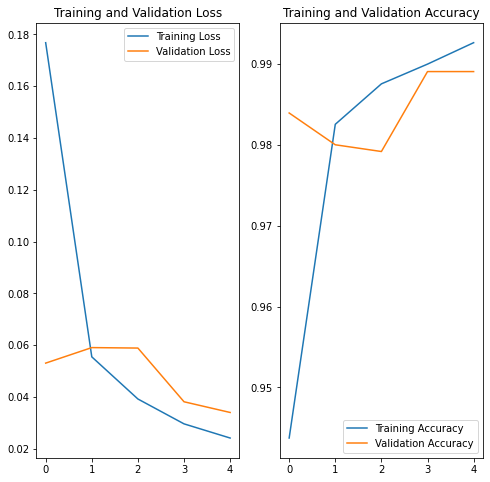

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(5) 

plt.figure(figsize=(8, 8))
plt.tight_layout()

plt.subplot(1, 2, 1)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.show()

In [13]:
prediction = model.predict(X_test_df)

submission = pd.DataFrame([])
image_id = [i for i in range(1, 28001)]
submission['ImageId'] = image_id
submission.loc[:, "label"] = np.argmax(prediction, axis = 1)

submission.to_csv("submission.csv",index=False)